## 실습 - Insurance Prediction

의료보험 데이터를 활용해 한 사람이 보험료를 얼마나 낼지를 예측하는 회귀 문제를 다뤄보겠습니다.데이터를 이루고 있는 column들에 대한 설명은 다음과 같습니다.

- Age: 피보험자의 나이
- Sex: 피보험자의 성별
- BMI: 피보험자의 체질량 지수 -  $weight(kg) / height(m)^2$
- Children: 피보험자의 자녀의 수
- Smoker: 흡연 여부 (yes / no)
- Region: 피보험자가 거주하는 지역 (Southeast / Southwest / Northeast / Northwest)
- Charges: 보험료

In [ ]:
!gdown --id 1cdFYc-VI-1nDuSecY-H1eSC1W0OR-CR_

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cdFYc-VI-1nDuSecY-H1eSC1W0OR-CR_
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 80.0MB/s]


In [1]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'insurance.csv'

### EDA

In [ ]:
# 데이터 타입 및 데이터 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# 타깃 데이터 확인
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
y.values

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
# 타깃 데이터 분포 확인
from matplotlib import pyplot as plt

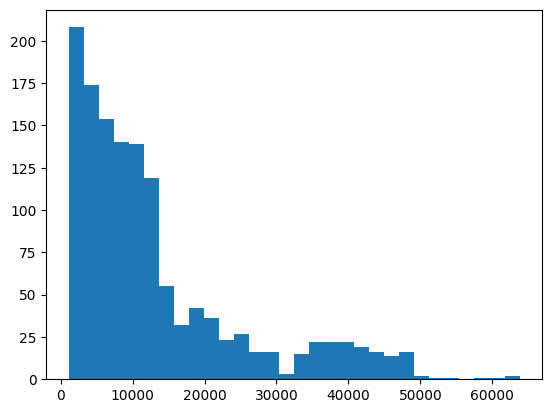

In [ ]:
plt.hist(y, bins = 30)
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="charges", nbins=40)
fig.show()

In [ ]:
# 데이터 분포 확인 - 수치형 --> hist

In [ ]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
# 데이터 분포 확인 - 카테고리형 (파이차트)
cat = ['sex', 'smoker', 'region']
for c in cat:
    print(df[c].value_counts())
    fig = px.pie(df, names=c)
    fig.show()

sex
male      676
female    662
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

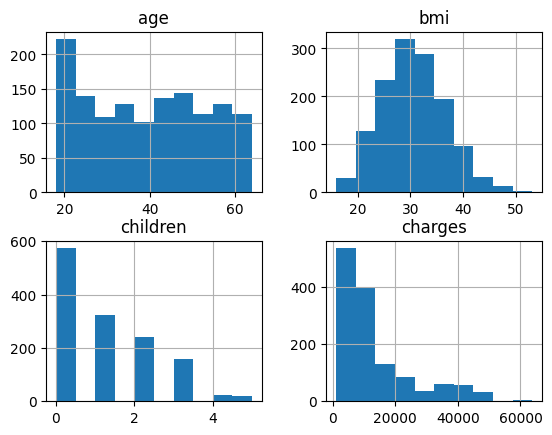

In [ ]:
df.hist()
#age - minmax, bmi - stan

### 데이터 전처리

데이터 전처리가 필요하다면 진행하세요

In [ ]:
# 결측치
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 데이터 타입 변환

In [ ]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
df.drop('charges', axis = 1)

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges', axis = 1), \
                                                    df['charges'], \
                                                    test_size=0.2, \
                                                    random_state=1004)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
# 인코딩
from sklearn.preprocessing import OneHotEncoder
oh_sex = OneHotEncoder()
sex_train = oh_sex.fit_transform(x_train[['sex']])
sex_test = oh_sex.transform(x_test[['sex']])
sex_train

<1070x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1070 stored elements in Compressed Sparse Row format>

In [ ]:
oh_sex.categories_[0]

array(['female', 'male'], dtype=object)

In [ ]:
x_train[oh_sex.categories_[0]] = sex_train.toarray()
x_test[oh_sex.categories_[0]] = sex_test.toarray()


In [ ]:
x_test.drop('sex', inplace = True, axis = 1)

In [ ]:
x_test

,age,bmi,children,smoker,region,female,male
975,29,22.895,0,yes,northeast,0.0,1.0
238,19,29.070,0,yes,northwest,0.0,1.0
1309,41,32.200,2,no,southwest,0.0,1.0
763,27,26.030,0,no,northeast,0.0,1.0
1047,22,52.580,1,yes,southeast,0.0,1.0
...,...,...,...,...,...,...,...
34,28,36.400,1,yes,southwest,0.0,1.0
307,30,33.330,1,no,southeast,1.0,0.0
748,47,36.000,1,no,southwest,1.0,0.0
732,24,30.100,3,no,southwest,1.0,0.0


In [ ]:
x_train.drop('sex', inplace = True, axis = 1)

x_train

,age,bmi,children,smoker,region,female,male
349,19,27.835,0,no,northwest,0.0,1.0
519,31,30.875,0,no,northeast,0.0,1.0
846,51,34.200,1,no,southwest,1.0,0.0
705,33,32.900,2,no,southwest,1.0,0.0
42,41,21.780,1,no,southeast,0.0,1.0
...,...,...,...,...,...,...,...
199,64,39.330,0,no,northeast,1.0,0.0
1263,43,29.900,1,no,southwest,1.0,0.0
31,18,26.315,0,no,northeast,1.0,0.0
523,38,37.730,0,no,southeast,1.0,0.0


In [ ]:
x_test

,age,sex,bmi,children,smoker,region,female,male
975,29,male,22.895,0,yes,northeast,0.0,1.0
238,19,male,29.070,0,yes,northwest,0.0,1.0
1309,41,male,32.200,2,no,southwest,0.0,1.0
763,27,male,26.030,0,no,northeast,0.0,1.0
1047,22,male,52.580,1,yes,southeast,0.0,1.0
...,...,...,...,...,...,...,...,...
34,28,male,36.400,1,yes,southwest,0.0,1.0
307,30,female,33.330,1,no,southeast,1.0,0.0
748,47,female,36.000,1,no,southwest,1.0,0.0
732,24,female,30.100,3,no,southwest,1.0,0.0


In [ ]:
oh_smk = OneHotEncoder()
tmp_train = oh_smk.fit_transform(x_train[['smoker']])
tmp_test = oh_smk.transform(x_test[['smoker']])
x_train[oh_smk.categories_[0]] = tmp_train.toarray()
x_test[oh_smk.categories_[0]] = tmp_test.toarray()
x_train.drop('smoker', inplace = True, axis = 1)
x_test.drop('smoker', inplace = True, axis = 1)

In [ ]:
x_train

,age,bmi,children,region,female,male,no,yes
349,19,27.835,0,northwest,0.0,1.0,1.0,0.0
519,31,30.875,0,northeast,0.0,1.0,1.0,0.0
846,51,34.200,1,southwest,1.0,0.0,1.0,0.0
705,33,32.900,2,southwest,1.0,0.0,1.0,0.0
42,41,21.780,1,southeast,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
199,64,39.330,0,northeast,1.0,0.0,1.0,0.0
1263,43,29.900,1,southwest,1.0,0.0,1.0,0.0
31,18,26.315,0,northeast,1.0,0.0,1.0,0.0
523,38,37.730,0,southeast,1.0,0.0,1.0,0.0


In [ ]:
oh_rgn = OneHotEncoder()
tmp_train = oh_rgn.fit_transform(x_train[['region']])
tmp_test = oh_rgn.transform(x_test[['region']])
x_train[oh_rgn.categories_[0]] = tmp_train.toarray()
x_test[oh_rgn.categories_[0]] = tmp_test.toarray()
x_train.drop('region', inplace = True, axis = 1)
x_test.drop('region', inplace = True, axis = 1)

In [ ]:
x_train

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
349,19,27.835,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
519,31,30.875,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
846,51,34.200,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
705,33,32.900,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
42,41,21.780,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
199,64,39.330,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1263,43,29.900,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31,18,26.315,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
523,38,37.730,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# 스케일링
# age - minmax, bmi - stan
age_scaler = MinMaxScaler()
train_age =  age_scaler.fit_transform(x_train[['age']])
test_age =  age_scaler.transform(x_test[['age']])

In [ ]:
x_train['age'] = train_age
x_test['age'] = test_age
x_train

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
349,0.021739,27.835,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
519,0.282609,30.875,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
846,0.717391,34.200,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
705,0.326087,32.900,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
42,0.500000,21.780,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
199,1.000000,39.330,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1263,0.543478,29.900,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31,0.000000,26.315,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
523,0.434783,37.730,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
bmi_scaler = StandardScaler()
x_train['bmi'] =  bmi_scaler.fit_transform(x_train[['bmi']])
x_test['bmi'] =  bmi_scaler.transform(x_test[['bmi']])
x_train

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
349,0.021739,-0.469044,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
519,0.282609,0.037199,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
846,0.717391,0.590904,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
705,0.326087,0.374418,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
42,0.500000,-1.477369,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
199,1.000000,1.445190,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1263,0.543478,-0.125165,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31,0.000000,-0.722166,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
523,0.434783,1.178746,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# 그 외 필요한 전처리

###  TIP!!
전처리가 끝났다면 상관관계 heatmap을 다시 한번 그려보세요!! 무엇이 보이나요?

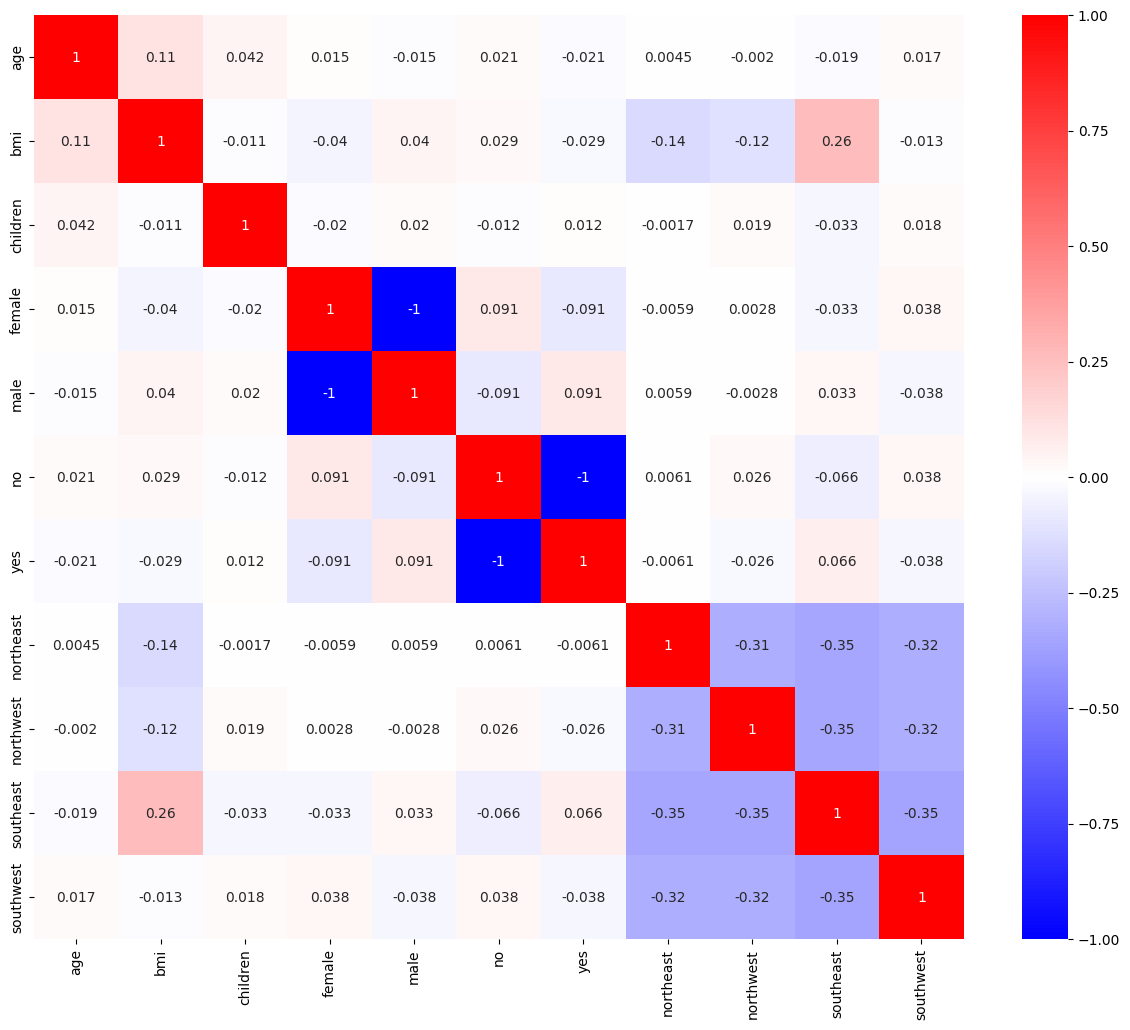

In [ ]:
import seaborn as sns
plt.figure(figsize = (15, 12))
sns.heatmap(x_train.corr(), annot = True, cmap = 'bwr')
plt.xticks(rotation = 90)
plt.show()

### 모델링

In [ ]:
x_train.drop('male', axis = 1, inplace = True)
x_test.drop('male', axis = 1, inplace = True)

x_train.drop('no', axis = 1, inplace = True)
x_test.drop('no', axis = 1, inplace = True)

x_train.drop('northeast', axis = 1, inplace = True)
x_test.drop('northeast', axis = 1, inplace = True)

x_train

,age,bmi,children,female,yes,northwest,southeast,southwest
349,0.021739,-0.469044,0,0.0,0.0,1.0,0.0,0.0
519,0.282609,0.037199,0,0.0,0.0,0.0,0.0,0.0
846,0.717391,0.590904,1,1.0,0.0,0.0,0.0,1.0
705,0.326087,0.374418,2,1.0,0.0,0.0,0.0,1.0
42,0.500000,-1.477369,1,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
199,1.000000,1.445190,0,1.0,0.0,0.0,0.0,0.0
1263,0.543478,-0.125165,1,1.0,0.0,0.0,0.0,1.0
31,0.000000,-0.722166,0,1.0,0.0,0.0,0.0,0.0
523,0.434783,1.178746,0,1.0,0.0,0.0,1.0,0.0


In [ ]:
x_train

,age,bmi,children,female,yes,northwest,southeast,southwest
349,0.021739,-0.469044,0,0.0,0.0,1.0,0.0,0.0
519,0.282609,0.037199,0,0.0,0.0,0.0,0.0,0.0
846,0.717391,0.590904,1,1.0,0.0,0.0,0.0,1.0
705,0.326087,0.374418,2,1.0,0.0,0.0,0.0,1.0
42,0.500000,-1.477369,1,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
199,1.000000,1.445190,0,1.0,0.0,0.0,0.0,0.0
1263,0.543478,-0.125165,1,1.0,0.0,0.0,0.0,1.0
31,0.000000,-0.722166,0,1.0,0.0,0.0,0.0,0.0
523,0.434783,1.178746,0,1.0,0.0,0.0,1.0,0.0


In [ ]:
x_train

,age,bmi,children,female,yes,northwest,southeast,southwest
349,0.021739,-0.469044,0,0.0,0.0,1.0,0.0,0.0
519,0.282609,0.037199,0,0.0,0.0,0.0,0.0,0.0
846,0.717391,0.590904,1,1.0,0.0,0.0,0.0,1.0
705,0.326087,0.374418,2,1.0,0.0,0.0,0.0,1.0
42,0.500000,-1.477369,1,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
199,1.000000,1.445190,0,1.0,0.0,0.0,0.0,0.0
1263,0.543478,-0.125165,1,1.0,0.0,0.0,0.0,1.0
31,0.000000,-0.722166,0,1.0,0.0,0.0,0.0,0.0
523,0.434783,1.178746,0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Train-Validation Split
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split()

#수업시간에는 cross validation과 tuning을 sklearn 함수인 gridsearchCV를 사용해 편리하게 했습니다.
#이번 과제에서도 해당 함수를 사용하셔도 됩니다.
#그러나 cross validation도 train_test_split 함수를 사용해 validation dataset을 만들어 직접 하이퍼 파라미터 튜닝을 할 수 있습니다.
#한번 직접 구현해 보실 분들은 for를 사용해서 직접 해 보시는 것도 좋습니다.

In [ ]:
# 다양한 모델을 시도해보세요
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
# 앙상블

In [ ]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
tree.score(x_test, y_test)

0.8963583635433325

In [ ]:
svm.score(x_test, y_test)

-0.10313255550606759

In [ ]:
import numpy as np

In [ ]:
train_score = []
val_score = []
for md in range(1, 21): #grid search
    tree = DecisionTreeRegressor(max_depth=md)
    tr_cv = []
    val_cv = []
    for cv in [10, 123, 777]: #cross val
        x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, random_state=cv)
        tree.fit(x_tr, y_tr)

        tr = tree.score(x_tr, y_tr)
        val = tree.score(x_val, y_val)
        tr_cv.append(tr)
        val_cv.append(val)
    train_score.append(np.mean(tr_cv))
    val_score.append(np.mean(val_cv))

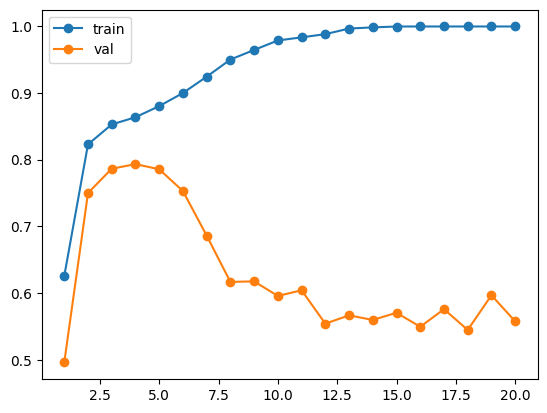

In [ ]:
plt.plot(list(range(1, 21)), train_score, 'o-', label = 'train')
plt.plot(list(range(1, 21)), val_score, 'o-', label = 'val')
plt.legend()
plt.show()

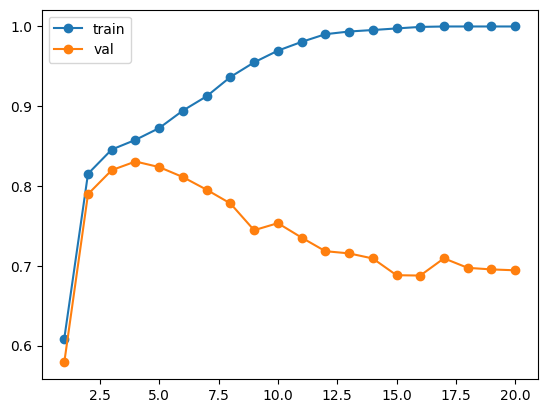

In [ ]:
plt.plot(list(range(1, 21)), train_score, 'o-', label = 'train')
plt.plot(list(range(1, 21)), val_score, 'o-', label = 'val')
plt.legend()
plt.show()

In [ ]:
# 모델 성능 확인 - 다양한 성능지표(R2, RMSE, MAE)

In [ ]:
# CV를 이용해 하이퍼 파라미터 튜닝 --> 모델 성능 최적화

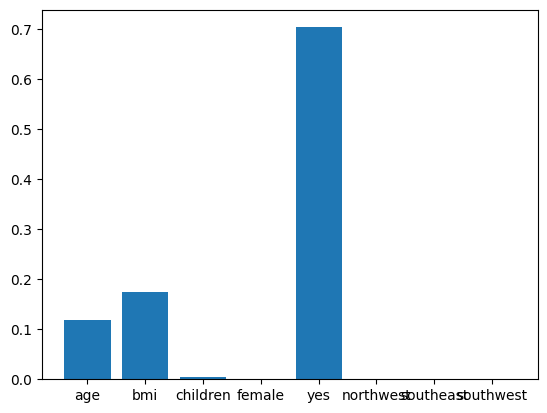

In [ ]:
# 최적 모델의 weight 시각화
importance = tree.feature_importances_
plt.bar(x_train.columns ,importance)
plt.show()

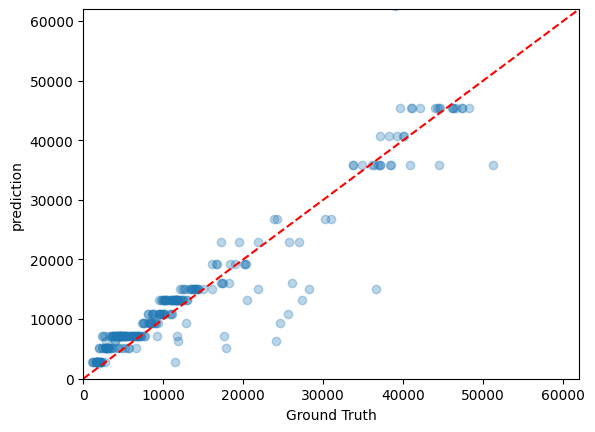

In [ ]:
y_pred = tree.predict(x_test)

plt.scatter(y_test, y_pred, alpha = 0.3)
plt.plot([0, 62000], [0, 62000], 'r--')
plt.xlim([0, 62000])
plt.ylim([0, 62000])
plt.xlabel('Ground Truth')
plt.ylabel('prediction')
plt.show()